In [1]:
import os

import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import Loss
from scipy import ndimage
from sklearn.model_selection import train_test_split

physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
data_size = 500
train_data = np.zeros((data_size,300,300,3), dtype=np.float32)

for i in range(0, data_size):
    img = keras.preprocessing.image.load_img('Datasets/crop_data/' + str(i) + '.png')
    img_arr = keras.preprocessing.image.img_to_array(img)
    
    train_data[i] = img_arr/255
    
data = pd.read_csv('Datasets/labels.csv')
pair1 = data[['m11','m22']][:data_size].to_numpy()
pair2 = data[['m12','m21']][:data_size].to_numpy()
pair3 = data[['m31','m32']][:data_size].to_numpy()

pair1 = pair1.astype(np.float32)
pair2 = pair2.astype(np.float32)
pair3 = pair3.astype(np.float32)

In [2]:
train_data = np.zeros((100,1000,1000,3), dtype=np.float32)

for i in range(0, 100):
    img = keras.preprocessing.image.load_img('Datasets/synthetic_data/' + str(i) + '.png')
    img_arr = keras.preprocessing.image.img_to_array(img)
    
    train_data[i] = img_arr/255

In [3]:
#with Densenet
def perspective_correction():
    inputs = keras.Input(shape=(300, 300, 3), batch_size=None)
    
    #dense_net
    x = keras.applications.DenseNet121(include_top=False)(inputs)
    md1_output = inner_model(x, idx=1)
    md2_output = inner_model(x, idx=2)
    md3_output = inner_model(x, idx=3)
    
    
    model = keras.Model(inputs=inputs, outputs=[md1_output, md2_output, md3_output], name='perspective_correction')
    
    return model

def inner_model(inputs, idx):
#     inputs = keras.Input(shape=(300, 300, 3), batch_size=None)
    
        
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(inputs)
    x = layers.MaxPool2D()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Activation('relu')(x)
    
#     x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
#     x = layers.MaxPool2D()(x)
#     x = layers.Activation('relu')(x)
    
#     x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
#     x = layers.MaxPool2D()(x)
#     x = layers.Activation('relu')(x)
    
#     x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
#     x = layers.MaxPool2D()(x)
#     x = layers.Activation('relu')(x)
    
#     x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
#     x = layers.MaxPool2D()(x)
#     x = layers.Activation('relu')(x)
    
#     x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
#     x = layers.MaxPool2D()(x)
#     x = layers.Activation('relu')(x)
    
#     x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
#     x = layers.MaxPool2D()(x)
#     x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters=128, kernel_size=(2,2), padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Activation('relu')(x)
    
    x = tf.keras.layers.Flatten()(x)
    
    x = layers.Dense(512)(x)
    x = layers.Dense(256)(x)
    x = layers.Dense(128)(x)
    x = layers.Dense(64)(x)
    x = layers.Dense(32)(x)
    x = layers.Dense(16)(x)
    outputs = layers.Dense(2,name='idx'+str(idx))(x)
#     outputs = WeightedMSELayer(name='idx'+str(idx))(outputs)
    
    return outputs

In [3]:
#conv only
def perspective_correction():
    inputs = keras.Input(shape=(300, 300, 3), batch_size=None)
    
    md1_output = inner_model(inputs, idx=1)
    md2_output = inner_model(inputs, idx=2)
    md3_output = inner_model(inputs, idx=3)
    
    
    model = keras.Model(inputs=inputs, outputs=[md1_output, md2_output, md3_output], name='perspective_correction')
    
    return model

def inner_model(inputs, idx):
#     inputs = keras.Input(shape=(300, 300, 3), batch_size=None)
    
        
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(inputs)
    x = layers.MaxPool2D()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Activation('relu')(x)
    
#     x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same')(x)
#     x = layers.MaxPool2D()(x)
#     x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters=128, kernel_size=(2,2), padding='same')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Activation('relu')(x)
    
    x = tf.keras.layers.Flatten()(x)
    
    x = layers.Dense(512)(x)
    x = layers.Dense(256)(x)
    x = layers.Dense(128)(x)
    x = layers.Dense(64)(x)
    x = layers.Dense(32)(x)
    x = layers.Dense(16)(x)
    outputs = layers.Dense(2,name='idx'+str(idx))(x)
#     outputs = WeightedMSELayer(name='idx'+str(idx))(outputs)
    
    return outputs

In [4]:
model = perspective_correction()

In [7]:
class WeightedMSE(Loss):
    def __init__(self, idx):
        super().__init__()
        if idx == 1:
            self.weight = 1.0
        elif idx == 2:
            self.weight = 10.0
        elif idx == 3:
            self.weight = 1.0 * pow(10,6)
        else:
            self.weight = 0.0
    
    def call(self, y_true, y_pred):
        #alpha = 10.0, beta = 1.0, gamma = 1.0 *10^6 = 1000000
        #batch size 단위로만 분리
        
#         print(y_true[0])
#         print(y_true[1])
#         print(y_true[2])
#         print(y_true[3])
        
#         print(y_pred.shape)
        
        loss = tf.keras.losses.mean_squared_error(y_true, y_pred) * self.weight
        
        return loss

In [5]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss=keras.losses.MeanSquaredError(),
              loss_weights={'idx1':1.0, 'idx2':10.0, 'idx3':1.0 * pow(10,6)})
model.fit(train_data[:data_size], {'idx1':pair1[:data_size], 'idx2':pair2[:data_size], 'idx3':pair3[:data_size]}, epochs=20, batch_size=8)

Epoch 1/20
63/63 [==============================] - 16s 163ms/step - loss: 1468.3545 - idx1_loss: 0.0637 - idx2_loss: 0.0044 - idx3_loss: 0.0015
Epoch 2/20
63/63 [==============================] - 9s 146ms/step - loss: 0.3234 - idx1_loss: 0.0189 - idx2_loss: 3.7013e-05 - idx3_loss: 3.0415e-07
Epoch 3/20
63/63 [==============================] - 9s 145ms/step - loss: 0.2679 - idx1_loss: 0.0144 - idx2_loss: 3.6482e-05 - idx3_loss: 2.5317e-07
Epoch 4/20
63/63 [==============================] - 9s 146ms/step - loss: 0.2173 - idx1_loss: 0.0139 - idx2_loss: 3.3096e-05 - idx3_loss: 2.0304e-07
Epoch 5/20
63/63 [==============================] - 9s 145ms/step - loss: 0.2047 - idx1_loss: 0.0159 - idx2_loss: 3.9112e-05 - idx3_loss: 1.8843e-07
Epoch 6/20
63/63 [==============================] - 9s 145ms/step - loss: 0.2485 - idx1_loss: 0.0144 - idx2_loss: 3.7783e-05 - idx3_loss: 2.3371e-07
Epoch 7/20
63/63 [==============================] - 9s 146ms/step - loss: 0.2067 - idx1_loss: 0.0144 - idx2_lo

In [13]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss={'idx1':WeightedMSE(1), 'idx2':WeightedMSE(2), 'idx3':WeightedMSE(3)})
model.fit(train_data[:100], {'idx1':pair1[:100], 'idx2':pair2[:100], 'idx3':pair3[:100]}, epochs=50, batch_size=2)

ValueError: Data cardinality is ambiguous:
  x sizes: 100
  y sizes: 100, 11, 100
Make sure all arrays contain the same number of samples.

In [6]:
model.save('img2h_epoch20')

INFO:tensorflow:Assets written to: img2h_epoch20\assets


In [8]:
data_size = 500
val_data = np.zeros((100,300,300,3), dtype=np.float32)

for i in range(data_size, data_size+100):
    img = keras.preprocessing.image.load_img('Datasets/crop_data/' + str(i) + '.png')
    img_arr = keras.preprocessing.image.img_to_array(img)
    
    val_data[i - data_size] = img_arr/255

v_data = pd.read_csv('Datasets/labels.csv')
v_pair1 = v_data[['m11','m22']][data_size:data_size+100].to_numpy()
v_pair2 = v_data[['m12','m21']][data_size:data_size+100].to_numpy()
v_pair3 = v_data[['m31','m32']][data_size:data_size+100].to_numpy()

v_pair1 = v_pair1.astype(np.float32)
v_pair2 = v_pair2.astype(np.float32)
v_pair3 = v_pair3.astype(np.float32)

model.evaluate(val_data, {'idx1':v_pair1, 'idx2':v_pair2, 'idx3':v_pair3})

ResourceExhaustedError: Graph execution error:

Detected at node 'perspective_correction/conv2d_16/Conv2D' defined at (most recent call last):
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 461, in dispatch_queue
      await self.process_one()
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 450, in process_one
      await dispatch(*args)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 357, in dispatch_shell
      await result
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 652, in execute_request
      reply_content = await reply_content
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 359, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2768, in run_cell
      result = self._run_cell(
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2814, in _run_cell
      return runner(coro)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3012, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3191, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3251, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\shpae\AppData\Local\Temp\ipykernel_11628\2964925307.py", line 19, in <module>
      model.evaluate(val_data, {'idx1':v_pair1, 'idx2':v_pair2, 'idx3':v_pair3})
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1716, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1525, in test_function
      return step_function(self, iterator)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1514, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1507, in run_step
      outputs = model.test_step(data)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1471, in test_step
      y_pred = self(x, training=False)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\convolutional.py", line 248, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "C:\Users\shpae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\convolutional.py", line 233, in convolution_op
      return tf.nn.convolution(
Node: 'perspective_correction/conv2d_16/Conv2D'
OOM when allocating tensor with shape[32,128,300,300] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node perspective_correction/conv2d_16/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_test_function_22645]

In [12]:
class WeightedMSELayer(layers.Layer):
    def __init_(self, idx):
        super(WeightedMSELayer, self).__init__()
        if idx == 1:
            self.weight = 1.0
        elif idx == 2:
            self.weight = 10.0
        elif idx == 3:
            self.weight = 1.0 * pow(10,6)
        else:
            self.weight = 0.0
    
    def call(self, inputs):
        self.add_loss(keras.losses.mean_squared_error(inputs) * self.weight)
        
        return inputs

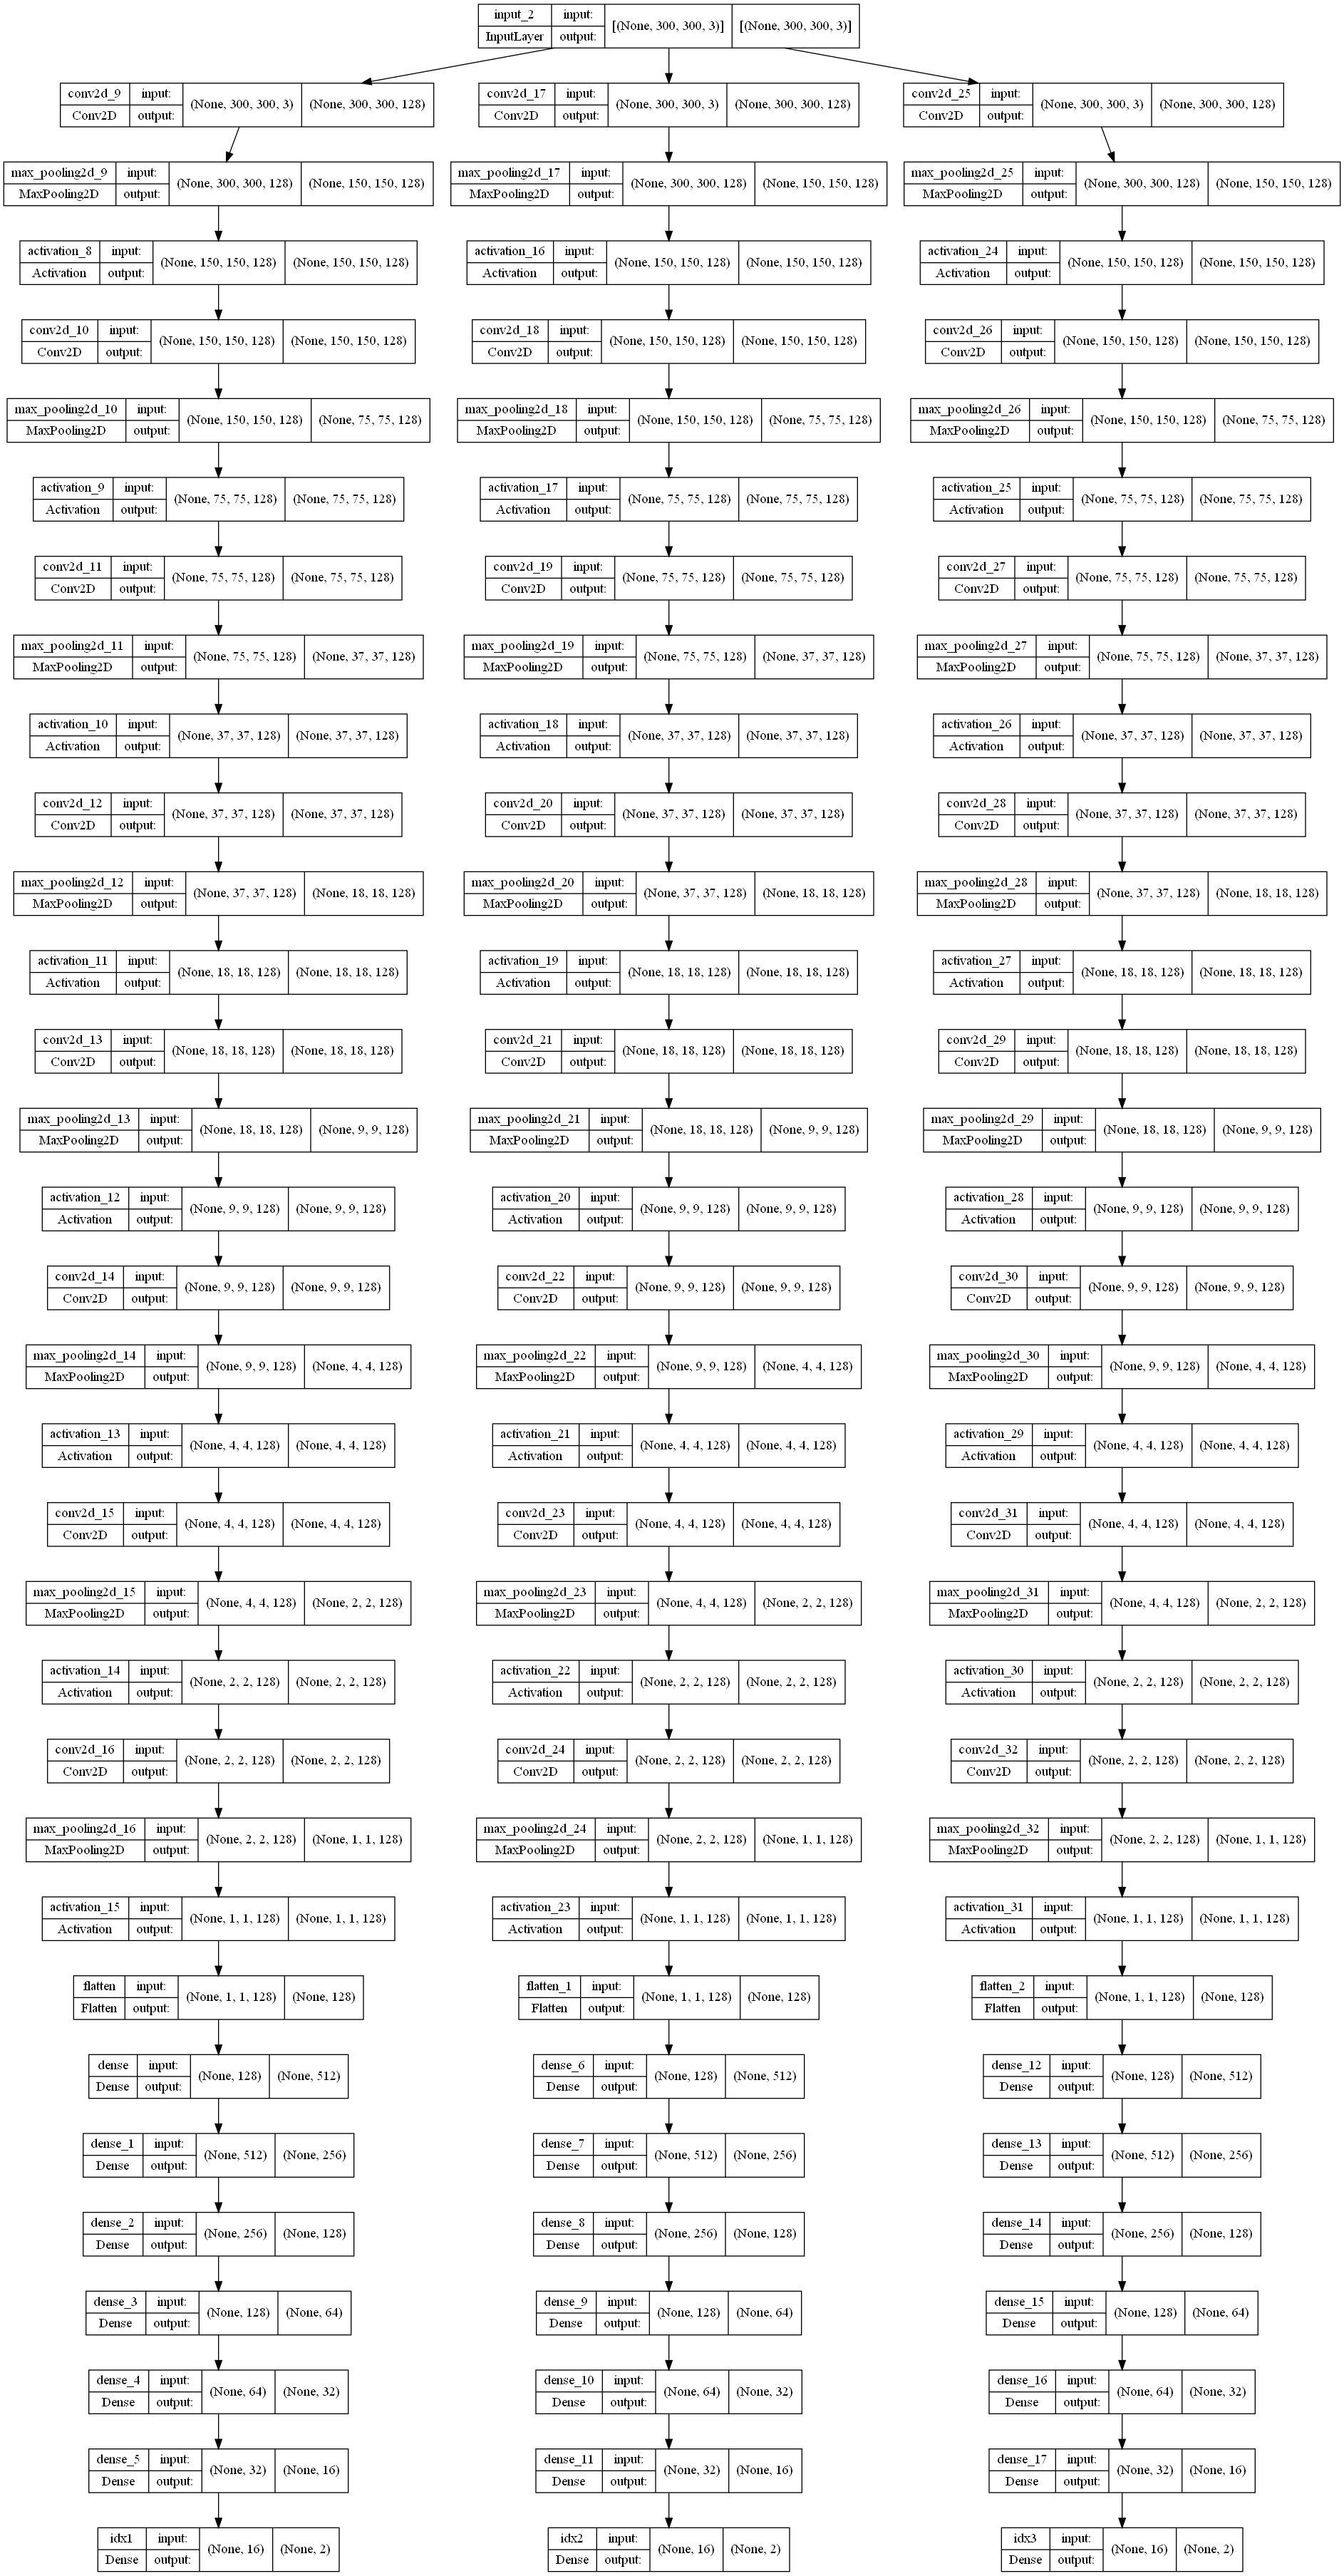

In [12]:
from tensorflow.keras.utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
plot_model(model, to_file='model.png', show_shapes=True)